In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from gpr4im import cov_tools as cov
from gpr4im import obs_tools as obs

In [2]:
# for plotting:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

Loading data:

In [3]:
data = pd.read_pickle('../../Data/data.pkl')
FGnopol_data = data.beam.foregrounds.sync + data.beam.foregrounds.psource + data.beam.foregrounds.free
FGpol_data = data.beam.foregrounds.pleak
HI_data = data.beam.HI
noise_data = data.beam.noise
freqs = data.freqs

Calculating frequency covariance matrices:

In [4]:
# calculating frequency covariance matrices:
C_HI = np.cov(obs.LoSpixels(HI_data))
C_FGnopol = np.cov(obs.LoSpixels(FGnopol_data))
C_FGpol = np.cov(obs.LoSpixels(FGpol_data))
C_noise = np.cov(obs.LoSpixels(noise_data))

In [5]:
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)

Text(0.5, 0, 'Frequency (MHz)')

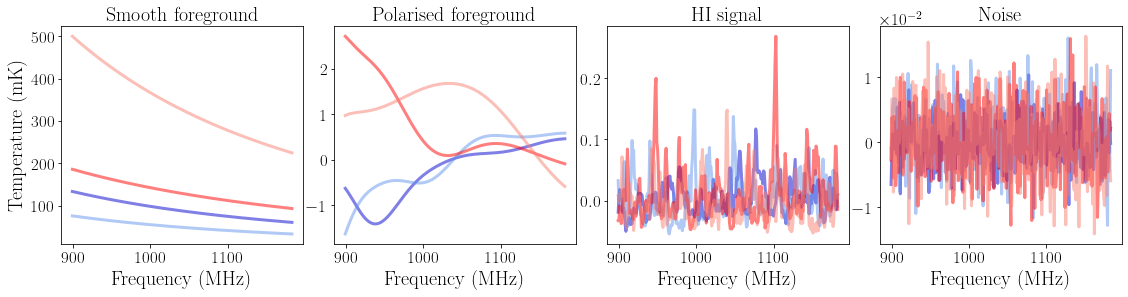

In [6]:
fig = plt.figure(figsize=(19,4))   # open a new plotting window
fig.subplots_adjust(wspace=0.13)

plt.subplot(141)
plt.plot(freqs,obs.LoSpixels(FGnopol_data)[:,4444],lw=3,alpha=0.5, c='mediumblue')
plt.plot(freqs,obs.LoSpixels(FGnopol_data)[:,444],lw=3,alpha=0.5, c='cornflowerblue')
plt.plot(freqs,obs.LoSpixels(FGnopol_data)[:,44],lw=3,alpha=0.5, c='red')
plt.plot(freqs,obs.LoSpixels(FGnopol_data)[:,4],lw=3,alpha=0.5, c='salmon')
plt.title('Smooth foreground', fontsize=20)
plt.ylabel('Temperature (mK)', fontsize=20)
plt.xlabel('Frequency (MHz)', fontsize=20)

plt.subplot(142)
plt.plot(freqs,obs.LoSpixels(FGpol_data)[:,4444],lw=3,alpha=0.5, c='mediumblue')
plt.plot(freqs,obs.LoSpixels(FGpol_data)[:,444],lw=3,alpha=0.5, c='cornflowerblue')
plt.plot(freqs,obs.LoSpixels(FGpol_data)[:,44],lw=3,alpha=0.5, c='red')
plt.plot(freqs,obs.LoSpixels(FGpol_data)[:,4],lw=3,alpha=0.5, c='salmon')
plt.title('Polarised foreground', fontsize=20)
plt.xlabel('Frequency (MHz)', fontsize=20)

plt.subplot(143)
plt.plot(freqs,obs.LoSpixels(HI_data)[:,4444],lw=3,alpha=0.5, c='mediumblue')
plt.plot(freqs,obs.LoSpixels(HI_data)[:,444],lw=3,alpha=0.5, c='cornflowerblue')
plt.plot(freqs,obs.LoSpixels(HI_data)[:,44],lw=3,alpha=0.5, c='red')
plt.plot(freqs,obs.LoSpixels(HI_data)[:,4],lw=3,alpha=0.5, c='salmon')
plt.title('HI signal', fontsize=20)
plt.xlabel('Frequency (MHz)', fontsize=20)

plt.subplot(144)
plt.plot(freqs,obs.LoSpixels(noise_data)[:,4444],lw=3,alpha=0.5, c='mediumblue')
plt.plot(freqs,obs.LoSpixels(noise_data)[:,444],lw=3,alpha=0.5, c='cornflowerblue')
plt.plot(freqs,obs.LoSpixels(noise_data)[:,44],lw=3,alpha=0.5, c='red')
plt.plot(freqs,obs.LoSpixels(noise_data)[:,4],lw=3,alpha=0.5, c='salmon')
plt.title('Noise', fontsize=20)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))
plt.xlabel('Frequency (MHz)', fontsize=20)

Plot showing how the kernel hyperparameter affect samples taken from that kernel:

In [7]:
x = np.arange(0, 100, 0.5)
n_samples = 10
z1, c1 = cov.get_kernel_samples('RBF', x, n_samples, l=1, var=1)
z2, c2 = cov.get_kernel_samples('RBF', x, n_samples, l=100, var=100)
z3, c3 = cov.get_kernel_samples('Exponential', x, n_samples, l=1, var=1)
z4, c4 = cov.get_kernel_samples('Exponential', x, n_samples, l=100, var=1)

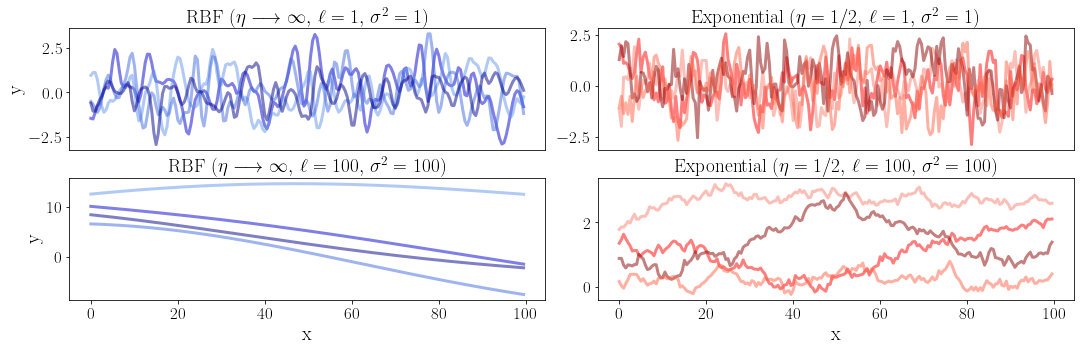

In [8]:
fig = plt.figure(figsize=(18,5))   # open a new plotting window

plt.subplot(221)
plt.plot(x, z1[0], lw=3,alpha=0.5, c='mediumblue')
plt.plot(x, z1[1], lw=3,alpha=0.5, c='cornflowerblue')
plt.plot(x, z1[2], lw=3,alpha=0.5, c='royalblue')
plt.plot(x, z1[3], lw=3,alpha=0.5, c='darkblue')
plt.ylabel('y', fontsize=20)
plt.title('RBF ($\eta \longrightarrow \infty, \, \ell = 1,\, \sigma^2 = 1$)')
plt.xticks([])


plt.subplot(222)
plt.plot(x, z3[0], lw=3,alpha=0.5, c='red')
plt.plot(x, z3[1], lw=3,alpha=0.5, c='salmon')
plt.plot(x, z3[2], lw=3,alpha=0.5, c='darkred')
plt.plot(x, z3[3], lw=3,alpha=0.5, c='tomato')
plt.title('Exponential ($\eta = 1/2, \, \ell = 1,\, \sigma^2 = 1$)')
plt.xticks([])

plt.subplot(223)
plt.plot(x, z2[0], lw=3,alpha=0.5, c='mediumblue')
plt.plot(x, z2[1], lw=3,alpha=0.5, c='cornflowerblue')
plt.plot(x, z2[2], lw=3,alpha=0.5, c='royalblue')
plt.plot(x, z2[3], lw=3,alpha=0.5, c='darkblue')
plt.ylabel('y', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.title('RBF ($\eta \longrightarrow \infty, \, \ell = 100,\, \sigma^2 = 100$)')

plt.subplot(224)
plt.plot(x, z4[0], lw=3,alpha=0.5, c='red')
plt.plot(x, z4[1], lw=3,alpha=0.5, c='salmon')
plt.plot(x, z4[2], lw=3,alpha=0.5, c='darkred')
plt.plot(x, z4[3], lw=3,alpha=0.5, c='tomato')
plt.xlabel('x', fontsize=20)
plt.title('Exponential ($\eta = 1/2, \, \ell = 100,\, \sigma^2 = 100$)')

plt.subplots_adjust(hspace=0.23, wspace=0.11)

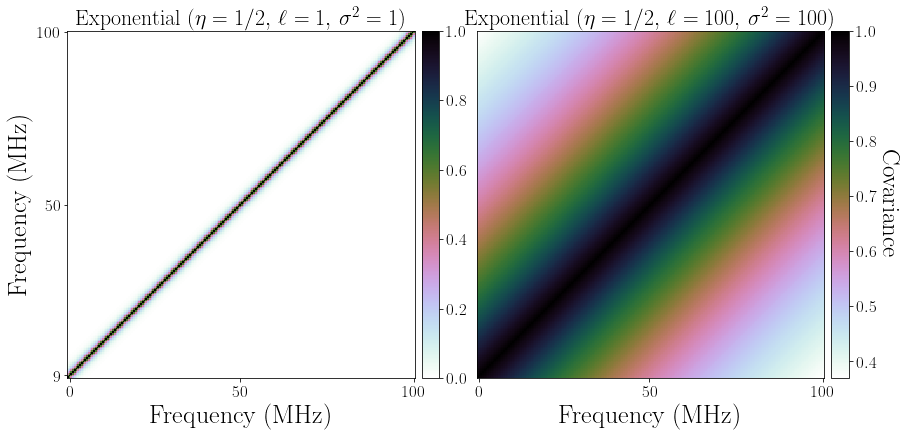

In [9]:
fig = plt.figure(figsize=(14,8))   # open a new plotting window

plt.subplot(121)
pos = plt.imshow(c3, interpolation='nearest', origin='lower', cmap='cubehelix_r')
cbar = fig.colorbar(pos, fraction=0.0467, pad=0.02)
cbar.ax.get_yaxis().labelpad = 25
cbar.formatter.set_powerlimits((0, 0))
plt.xticks([1, 99, 199], [0, 50, 100])
plt.yticks([1, 99, 199], [9, 50, 100])
plt.xlabel('Frequency (MHz)', fontsize=26)
plt.ylabel('Frequency (MHz)', fontsize=26)
plt.title('Exponential ($\eta = 1/2, \, \ell = 1,\, \sigma^2 = 1$)', fontsize=22)

plt.subplot(122)
pos = plt.imshow(c4, interpolation='nearest', origin='lower', cmap='cubehelix_r')
cbar = fig.colorbar(pos, fraction=0.0467, pad=0.02)
cbar.ax.set_ylabel(r'Covariance', rotation=270, fontsize=25)
cbar.ax.get_yaxis().labelpad = 25
plt.yticks([])
plt.xticks([1, 99, 199], [0, 50, 100])
plt.xlabel('Frequency (MHz)', fontsize=26)
plt.title('Exponential ($\eta = 1/2, \, \ell = 100,\, \sigma^2 = 100$)', fontsize=22)

plt.subplots_adjust(wspace=0.1)

Plot showing the best-fit kernels found for each component, for the with polarisation case:

In [10]:
# multinest results:
multinest_results = pd.read_pickle('../../Data/multinest_results.pkl')
multinest = multinest_results.wpol

In [11]:
X = freqs
n_samples=10
z21, c21 = cov.get_kernel_samples('Exponential', X, n_samples, l=multinest.exp_len, var=multinest.exp_var)
zfg, cfg = cov.get_kernel_samples('RBF', X, n_samples, l=multinest.rbf1_len, var=multinest.rbf1_var)
zpol, cpol = cov.get_kernel_samples('RBF', X, n_samples, l=multinest.rbf2_len, var=multinest.rbf2_var)

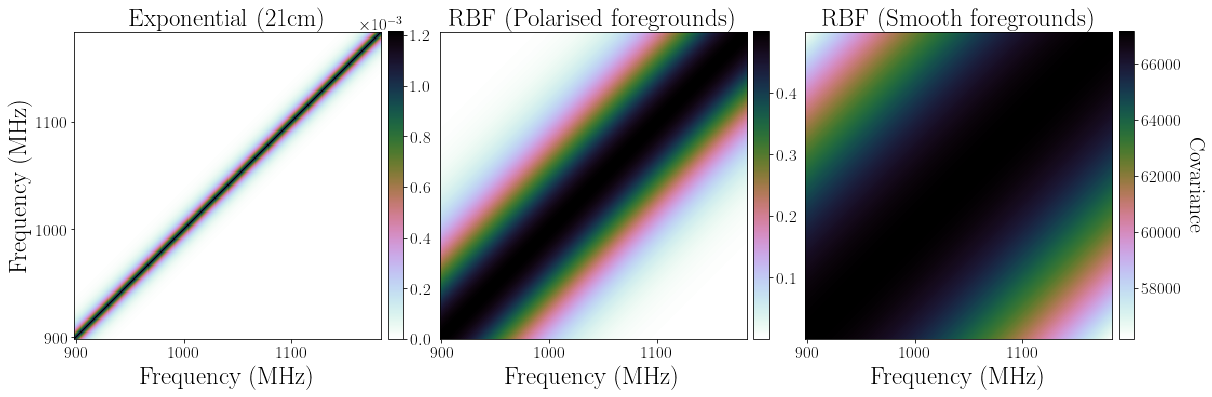

In [12]:
fig = plt.figure(figsize=(19,10))   # open a new plotting window

plt.subplot(131)


plt.subplot(131)
pos = plt.imshow(c21, interpolation='nearest', origin='lower', cmap='cubehelix_r')
cbar = fig.colorbar(pos, fraction=0.0467, pad=0.02)
cbar.ax.get_yaxis().labelpad = 25
cbar.formatter.set_powerlimits((0, 0))
plt.xticks([1, 101, 201], [900, 1000, 1100])
plt.yticks([1, 101, 201], [900, 1000, 1100])
plt.xlabel('Frequency (MHz)', fontsize=25)
plt.ylabel('Frequency (MHz)', fontsize=25)
plt.title('Exponential (21cm)', fontsize=25)

plt.subplot(132)
pos = plt.imshow(cpol, interpolation='nearest', origin='lower', cmap='cubehelix_r')
cbar = fig.colorbar(pos, fraction=0.0467, pad=0.02)
cbar.ax.get_yaxis().labelpad = 25
plt.xticks([1, 101, 201], [900, 1000, 1100])
plt.yticks([])
plt.xlabel('Frequency (MHz)', fontsize=25)
plt.title('RBF (Polarised foregrounds)', fontsize=25)

plt.subplot(133)
pos = plt.imshow(cfg, interpolation='nearest', origin='lower', cmap='cubehelix_r')
cbar = fig.colorbar(pos, fraction=0.0467, pad=0.02)
cbar.ax.set_ylabel(r'Covariance', rotation=270, fontsize=22)
cbar.ax.get_yaxis().labelpad = 25
plt.xticks([1, 101, 201], [900, 1000, 1100])
plt.yticks([])
plt.xlabel('Frequency (MHz)', fontsize=25)
plt.title('RBF (Smooth foregrounds)', fontsize=25)

plt.subplots_adjust(wspace=0.11)